<a href="https://colab.research.google.com/github/snehanshuchk/EDA-Theory-/blob/main/21BDS0313.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **21BDS0313
 SNEHANSHU CHAKRABORTY**


**THEORY DIGITAL ANALYSIS**

*EXPLORATORY DATA ANALYSIS*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:


url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/house%20price.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


In [ ]:
df['sqft_living'].value_counts()

In [93]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Year,Month,Cluster,PCA1,PCA2
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4599.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000,4600.000000,4.600000e+03,4.600000e+03
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240705,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0,5.965652,1.370652,-4.325043e-17,2.316987e-17
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778481,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,2.310463,0.681989,1.576658e+00,9.105593e-01
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,1.000000,0.000000,-3.595810e+00,-3.128609e+00
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,5.000000,1.000000,-1.010507e+00,-3.230432e-01
50%,4.609430e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,6.000000,1.000000,-1.444481e-01,-3.870931e-02
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,6.000000,2.000000,8.505509e-01,3.007173e-01
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0,12.000000,2.000000,1.547873e+01,4.117422e+01


In [94]:
df.stack()

date                   
2014-02-05  price            313000
            bedrooms              3
            bathrooms           1.5
            sqft_living        1340
            sqft_lot           7912
                             ...   
2014-10-07  Year               2014
            Month                10
            Cluster               2
            PCA1          -0.573011
            PCA2          -0.371399
Length: 101194, dtype: object

In [95]:
df.duplicated()

,0
date,
2014-02-05,False
2014-02-05,False
2014-02-05,False
2014-02-05,False
2014-02-05,False
...,...
2014-09-07,False
2014-09-07,False
2014-09-07,False


In [96]:
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,Year,Month,Cluster,PCA1,PCA2
date,,,,,,,,,,,,,,,,,,,,,
2014-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-02-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-09-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-09-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
df.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,4
view,1
condition,0
sqft_above,0


In [98]:
df.isnull().sum().sum()

np.int64(6)

In [99]:
df.waterfront[df.waterfront.isnull()]

,waterfront
date,
2014-05-05,NaN
2014-06-05,NaN
2014-06-05,NaN
2014-07-05,NaN


In [100]:
df.view[df.view.isnull()]

,view
date,
2014-05-05,NaN


In [101]:
df.country[df.country.isnull()]

,country
date,
2014-12-05,NaN


In [102]:
df1=df
df1.dropna()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,Year,Month,Cluster,PCA1,PCA2
date,,,,,,,,,,,,,,,,,,,,,
2014-02-05,313000,3,1.50,1340,7912,1.5,0,0.0,3,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,2,1,-1.310128,-0.027035
2014-02-05,2384000,5,2.50,3650,9050,2.0,0,4.0,5,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,2,0,3.150390,1.992214
2014-02-05,342000,3,2.00,1930,11947,1.0,0,0.0,4,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,2,1,-0.584456,-0.098795
2014-02-05,420000,3,2.25,2000,8030,1.0,0,0.0,4,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,2,2,-0.317018,-0.027134
2014-02-05,550000,4,2.50,1940,10500,1.0,0,0.0,4,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,2,2,0.436389,-0.350072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-07,308166,3,1.75,1510,6360,1.0,0,0.0,4,1510,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,9,1,-1.034651,-0.088989
2014-09-07,534333,3,2.50,1460,7573,2.0,0,0.0,3,1460,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,9,2,-0.393668,0.122648
2014-09-07,416904,3,2.50,3010,7014,2.0,0,0.0,3,3010,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,9,2,0.464858,-0.115309


In [103]:
df2=df
filledDf = df2.fillna(0)
filledDf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,Year,Month,Cluster,PCA1,PCA2
date,,,,,,,,,,,,,,,,,,,,,
2014-02-05,313000,3,1.50,1340,7912,1.5,0,0.0,3,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,2,1,-1.310128,-0.027035
2014-02-05,2384000,5,2.50,3650,9050,2.0,0,4.0,5,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,2,0,3.150390,1.992214
2014-02-05,342000,3,2.00,1930,11947,1.0,0,0.0,4,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,2,1,-0.584456,-0.098795
2014-02-05,420000,3,2.25,2000,8030,1.0,0,0.0,4,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,2,2,-0.317018,-0.027134
2014-02-05,550000,4,2.50,1940,10500,1.0,0,0.0,4,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,2,2,0.436389,-0.350072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-07,308166,3,1.75,1510,6360,1.0,0,0.0,4,1510,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,9,1,-1.034651,-0.088989
2014-09-07,534333,3,2.50,1460,7573,2.0,0,0.0,3,1460,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,9,2,-0.393668,0.122648
2014-09-07,416904,3,2.50,3010,7014,2.0,0,0.0,3,3010,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,9,2,0.464858,-0.115309


In [104]:
df3=df
df3.fillna(method='ffill')

<ipython-input-104-957b0cada0b9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3.fillna(method='ffill')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,Year,Month,Cluster,PCA1,PCA2
date,,,,,,,,,,,,,,,,,,,,,
2014-02-05,313000,3,1.50,1340,7912,1.5,0,0.0,3,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,2,1,-1.310128,-0.027035
2014-02-05,2384000,5,2.50,3650,9050,2.0,0,4.0,5,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,2,0,3.150390,1.992214
2014-02-05,342000,3,2.00,1930,11947,1.0,0,0.0,4,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,2,1,-0.584456,-0.098795
2014-02-05,420000,3,2.25,2000,8030,1.0,0,0.0,4,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,2,2,-0.317018,-0.027134
2014-02-05,550000,4,2.50,1940,10500,1.0,0,0.0,4,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,2,2,0.436389,-0.350072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-07,308166,3,1.75,1510,6360,1.0,0,0.0,4,1510,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,9,1,-1.034651,-0.088989
2014-09-07,534333,3,2.50,1460,7573,2.0,0,0.0,3,1460,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,9,2,-0.393668,0.122648
2014-09-07,416904,3,2.50,3010,7014,2.0,0,0.0,3,3010,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,9,2,0.464858,-0.115309


In [105]:
df3.fillna(method='bfill')

<ipython-input-105-eb1e42f7d55f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3.fillna(method='bfill')


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,yr_renovated,street,city,statezip,country,Year,Month,Cluster,PCA1,PCA2
date,,,,,,,,,,,,,,,,,,,,,
2014-02-05,313000,3,1.50,1340,7912,1.5,0,0.0,3,1340,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,2,1,-1.310128,-0.027035
2014-02-05,2384000,5,2.50,3650,9050,2.0,0,4.0,5,3370,...,0,709 W Blaine St,Seattle,WA 98119,USA,2014,2,0,3.150390,1.992214
2014-02-05,342000,3,2.00,1930,11947,1.0,0,0.0,4,1930,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2014,2,1,-0.584456,-0.098795
2014-02-05,420000,3,2.25,2000,8030,1.0,0,0.0,4,1000,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,2014,2,2,-0.317018,-0.027134
2014-02-05,550000,4,2.50,1940,10500,1.0,0,0.0,4,1140,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,2014,2,2,0.436389,-0.350072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-07,308166,3,1.75,1510,6360,1.0,0,0.0,4,1510,...,1979,501 N 143rd St,Seattle,WA 98133,USA,2014,9,1,-1.034651,-0.088989
2014-09-07,534333,3,2.50,1460,7573,2.0,0,0.0,3,1460,...,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,2014,9,2,-0.393668,0.122648
2014-09-07,416904,3,2.50,3010,7014,2.0,0,0.0,3,3010,...,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2014,9,2,0.464858,-0.115309


Outliear detection and filtering

In [106]:
import numpy as np

In [107]:
#less with 20000 square foot lot
sqft = df["sqft_lot"]
sqft[np.abs(sqft) < 20000]

,sqft_lot
date,
2014-02-05,7912
2014-02-05,9050
2014-02-05,11947
2014-02-05,8030
2014-02-05,10500
...,...
2014-09-07,6360
2014-09-07,7573
2014-09-07,7014


MOD 3

In [108]:
df.dtypes

,0
price,int64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,object
view,float64
condition,int64
sqft_above,int64


In [109]:
print(df.describe())
pd.isna(df).any()

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609430e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4599.000000  4600.000000  4600.000000    4600.000000   
mean      1.512065     0.240705     3.451739  1827.265435     312.081522   
std       0.538288     0.778481     0.677230   862.168977     464.137228   
mi

,0
price,False
bedrooms,False
bathrooms,False
sqft_living,False
sqft_lot,False
floors,False
waterfront,True
view,True
condition,False
sqft_above,False


In [110]:
df['statezip'].str.isnumeric().value_counts()

,count
statezip,
False,4600


In [111]:
df['street'].str.isnumeric().value_counts()

,count
street,
False,4600


In [112]:
price = df['price'].loc[df['price'] != '?']
print(price)
pmean = price.astype(int).mean()
print("Mean =",pmean)
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head(10)

date
2014-02-05     313000
2014-02-05    2384000
2014-02-05     342000
2014-02-05     420000
2014-02-05     550000
               ...   
2014-09-07     308166
2014-09-07     534333
2014-09-07     416904
2014-10-07     203400
2014-10-07     220600
Name: price, Length: 4600, dtype: int64
Mean = 551962.9754347826


,price
date,
2014-02-05,313000
2014-02-05,2384000
2014-02-05,342000
2014-02-05,420000
2014-02-05,550000
2014-02-05,490000
2014-02-05,335000
2014-02-05,482000
2014-02-05,452500


**Load the Dataset and explore Dimension, Summary, Data Handling, Data Cleaning,
Univariate, Bivariate and Multivariate Analysis (all the possibilities of visualizations).**

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Check dimensions
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (4600, 22)


In [115]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       4
view             1
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          1
Year             0
Month            0
Cluster          0
PCA1             0
PCA2             0
dtype: int64


In [116]:
# Data Cleaning: Drop duplicates (if any)
df.drop_duplicates(inplace=True)

<Figure size 1800x900 with 0 Axes>

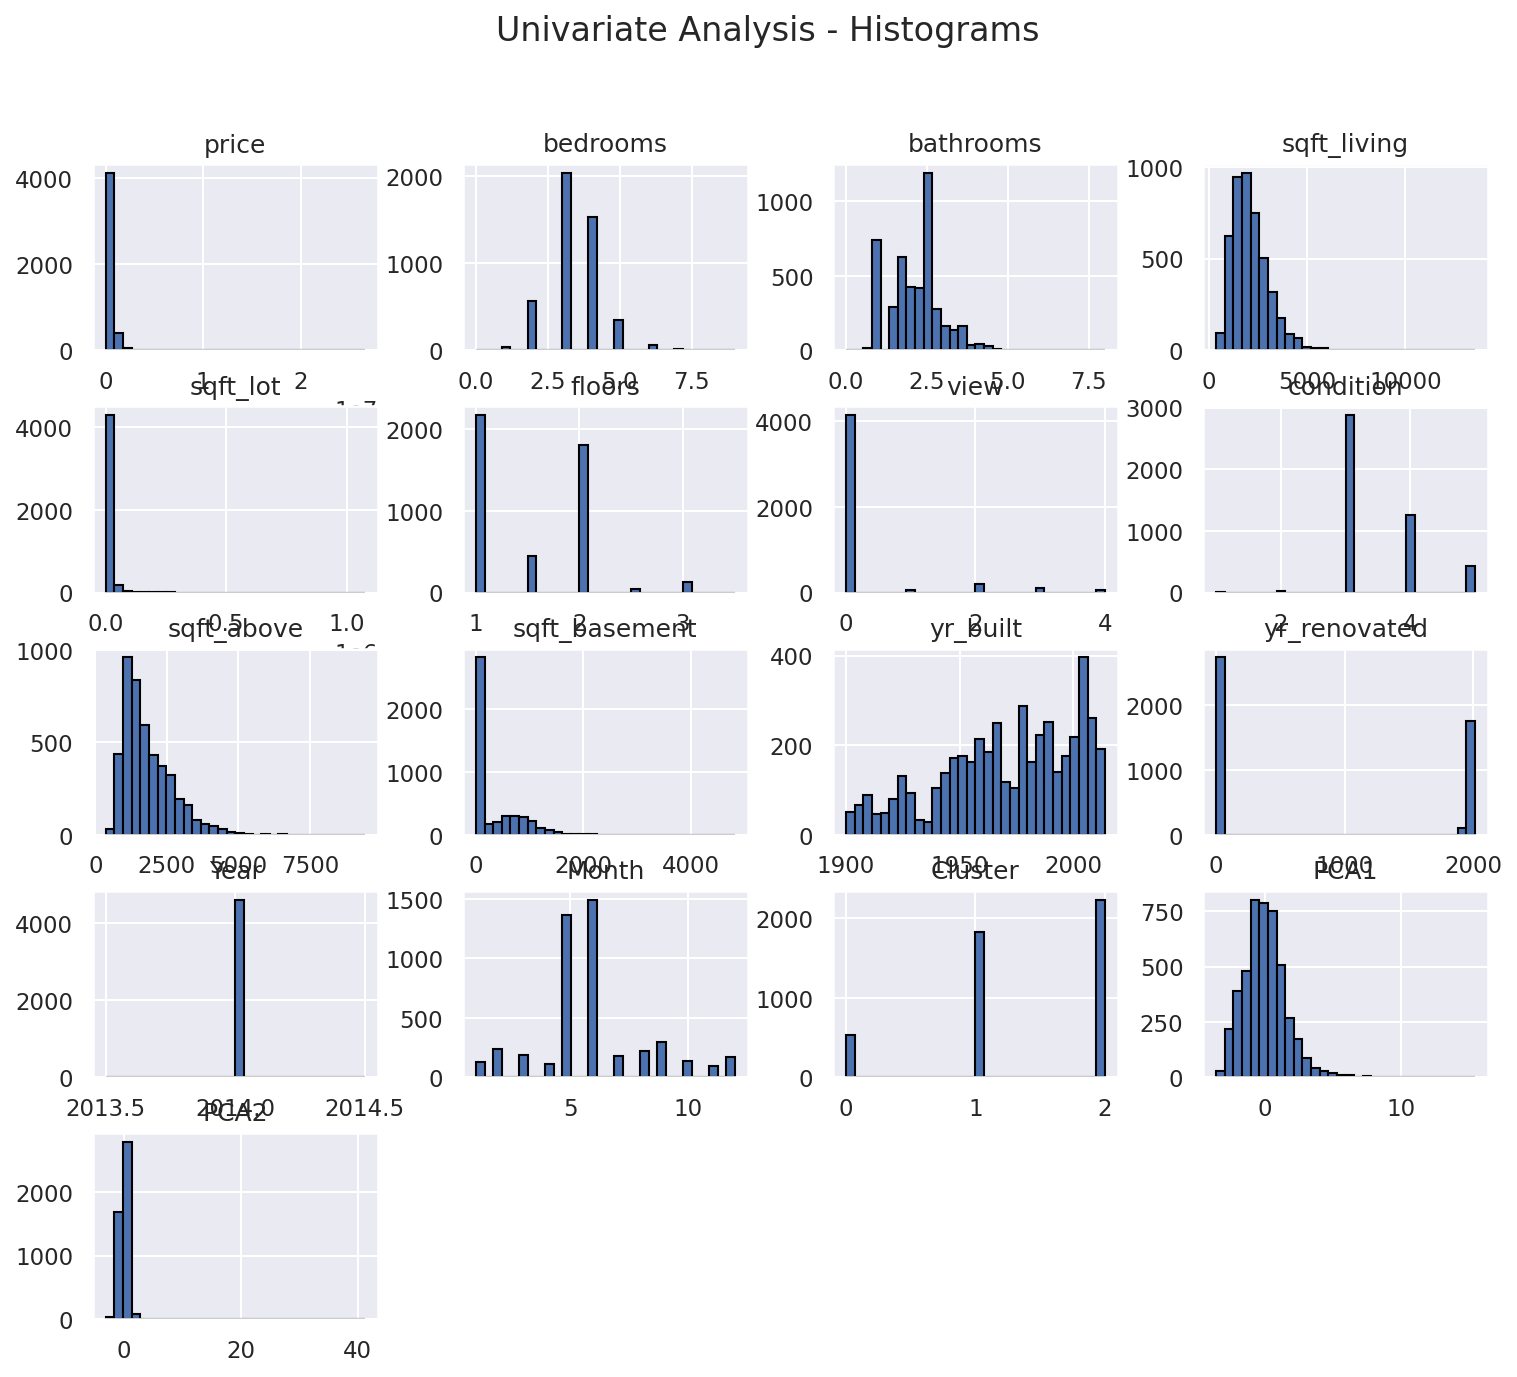

In [117]:
# Univariate Analysis - Histograms
plt.figure(figsize=(12, 6))
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Univariate Analysis - Histograms", fontsize=16)
plt.show()

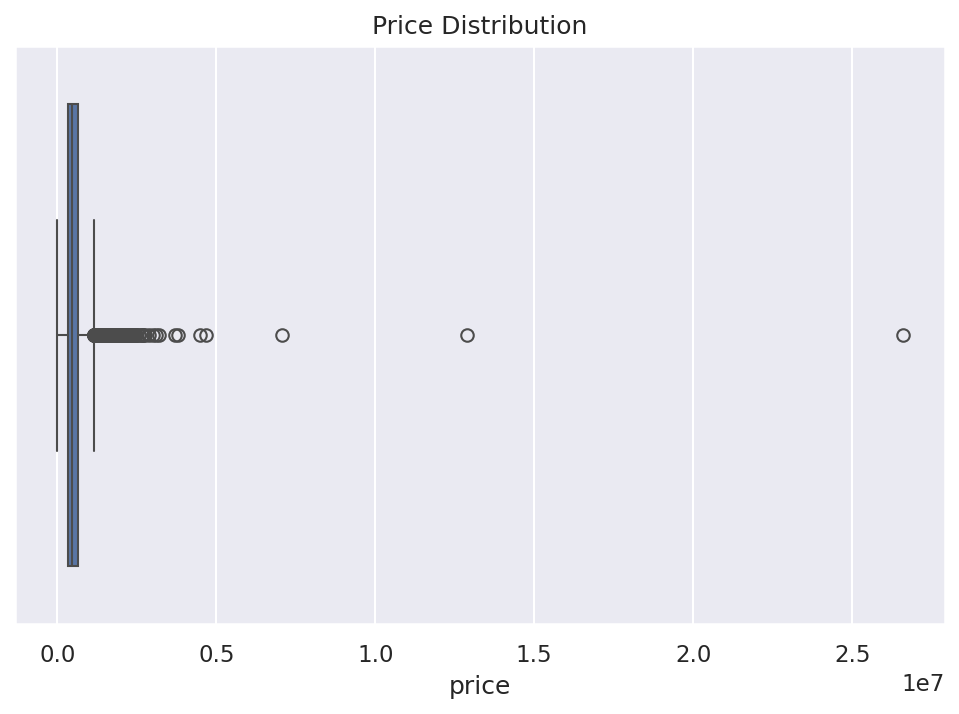

In [118]:
# Boxplot for price distribution
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title("Price Distribution")
plt.show()


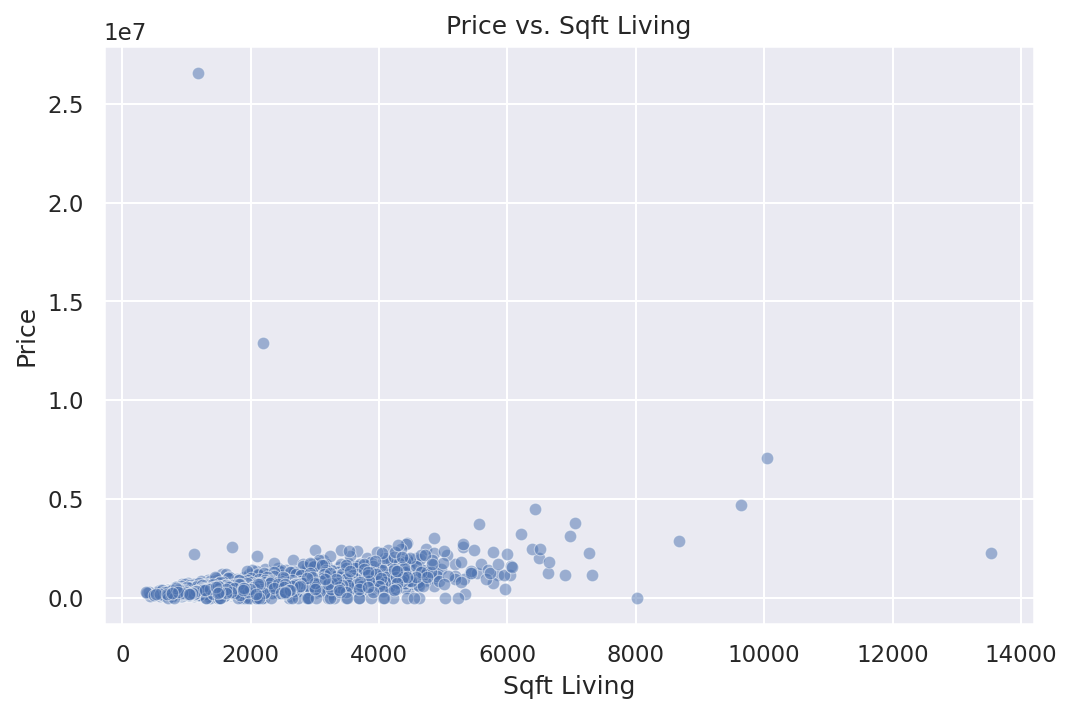

In [119]:
# Bivariate Analysis - Scatter plot of price vs sqft_living
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.show()

In [120]:
# Multivariant analysis
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop non-numeric columns before correlation analysis
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns

# Updated Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


KeyError: 'date'

In [ ]:
# Multivariate Analysis - Pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df_numeric[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']], diag_kind='kde')
plt.suptitle("Multivariate Analysis - Pairplot", fontsize=16)
plt.show()

In [ ]:
# Multivariate Analysis - 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sqft_living'], df['bedrooms'], df['price'], alpha=0.5)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title("3D Scatter Plot of Price vs Sqft Living & Bedrooms")
plt.show()

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Time series analysis

In [ ]:
# For better plot aesthetics
sns.set(rc={'figure.figsize': (11, 4)})
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 150

In [ ]:
# Convert the 'date' column to datetime format and set it as the DataFrame index.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Display basic information about the DataFrame.
print("Dataset Preview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

In [ ]:
# 2. Basic Time Series Plot: House Price Over Time
# ------------------------------------------------------------------------------

plt.figure()
sns.lineplot(data=df, x=df.index, y='price', color='blue')
plt.title("House Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# 3. Resampling and Aggregating: Monthly & Weekly Averages
# ------------------------------------------------------------------------------

# (a) Monthly average house price
monthly_price = df['price'].resample('M').mean()
plt.figure()
monthly_price.plot(marker='o', linestyle='-')
plt.title("Monthly Average House Price")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.show()

# (b) Weekly average house price
weekly_price = df['price'].resample('W').mean()
plt.figure()
weekly_price.plot(marker='o', linestyle='-', color='green', label='Weekly Avg Price')
plt.title("Weekly Average House Price")
plt.xlabel("Week")
plt.ylabel("Average Price")
plt.legend()
plt.show()

In [ ]:
# ------------------------------------------------------------------------------
# 4. Grouping Data: Box Plots by Year and Month
# ------------------------------------------------------------------------------

df['Year'] = df.index.year
df['Month'] = df.index.month

# Box plot by Year
plt.figure()
sns.boxplot(x='Year', y='price', data=df)
plt.title("House Price Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Box plot by Month
plt.figure()
sns.boxplot(x='Month', y='price', data=df)
plt.title("House Price Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()


In [ ]:
# ------------------------------------------------------------------------------
# 5. Moving Average: Smoothing the Time Series
# ------------------------------------------------------------------------------
# 5a. Resample the data to daily frequency (mean price per day)
df_daily = df['price'].resample('D').mean()

# 5b. Apply log transform to handle large ranges
df_daily_log = np.log1p(df_daily)  # log(1 + price) to avoid issues if price=0

#5c. Calculate a 30-day rolling average on the log-transformed data
df_daily_log_ma30 = df_daily_log.rolling(window=30).mean()

# 5d. Plot the original (log-transformed) and the moving average
plt.figure()
plt.plot(df_daily_log, label='Log(Price)', alpha=0.5)
plt.plot(df_daily_log_ma30, label='30-day MA (Log(Price))', color='red')
plt.title("House Price (Log Scale) and 30-day Moving Average (Daily)")
plt.xlabel("Date")
plt.ylabel("Log(Price)")
plt.legend()
plt.show()


Statistical Analysis

In [ ]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # Taking first mode
kurtosis_price = kurtosis(df['price'])
skewness_price = skew(df['price'])

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Mode Price: {mode_price}")
print(f"Kurtosis: {kurtosis_price}")
print(f"Skewness: {skewness_price}")

K means Clustering and Elbow method

In [ ]:
# ============================
# 6. K-Means Clustering & Elbow Method
# ============================
# Select features for clustering
clustering_features = df[['price', 'sqft_living', 'bedrooms', 'bathrooms']].dropna()

# Standardize data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means with optimal K (assume K=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(clustering_scaled)

In [ ]:
# ============================
# 7. PCA for Dimensionality Reduction
# ============================
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot of PCA results
plt.figure()
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Clustering Visualization')
plt.legend(title='Cluster')
plt.show()

Linear Regression model

RMSE: 993598.5615001788
R^2 Score: 0.03197367818065089


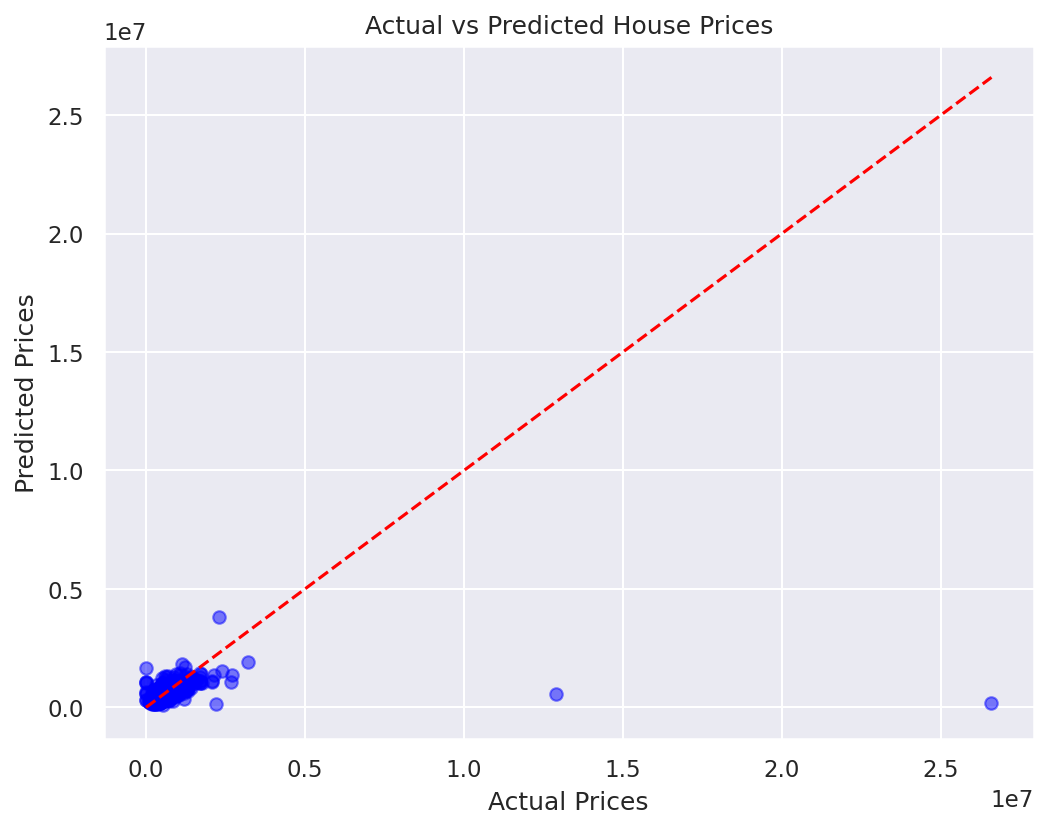

In [125]:
# Drop non-numeric columns except 'price'
df = df.select_dtypes(include=[np.number])

# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features and target variable
X = df_imputed.drop(columns=['price'])
y = df_imputed['price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
plt.show()

K-Means Clustering & Visualization

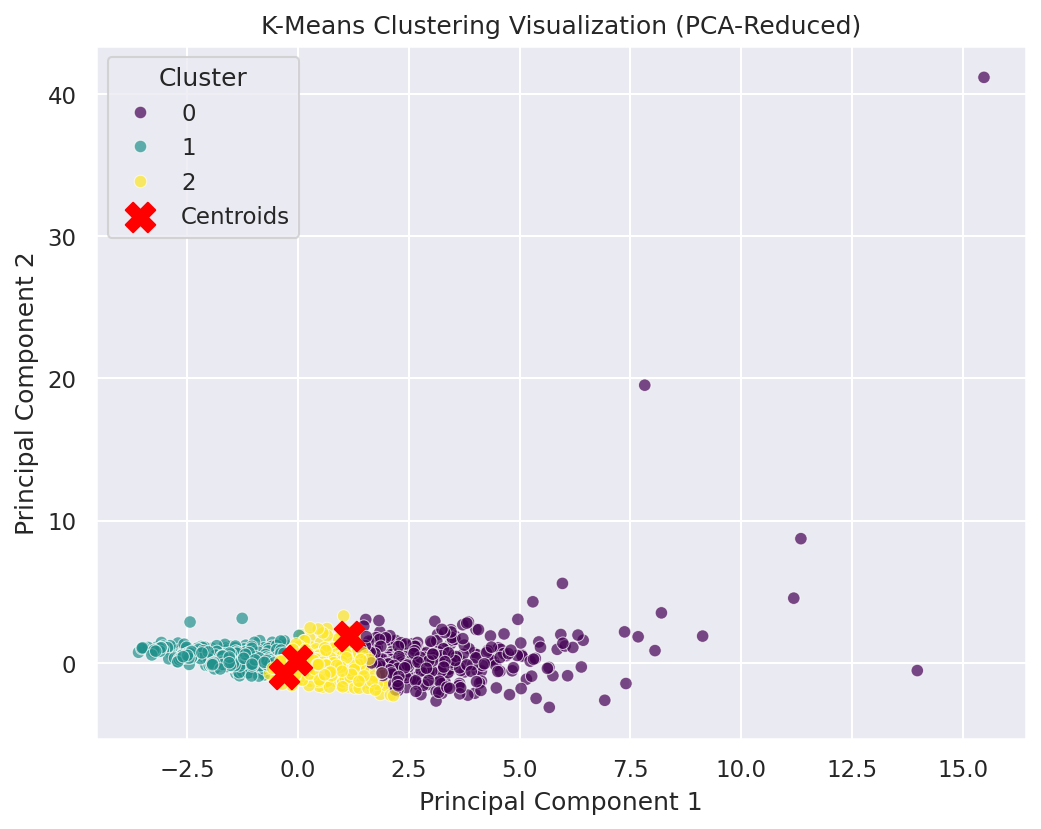

In [121]:
# Apply K-Means with optimal K (assume K=3 from Elbow Method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(clustering_scaled)

# PCA for 2D Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(clustering_scaled)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization (PCA-Reduced)')
plt.legend(title='Cluster')
plt.show()